In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Peak Forecasting Demo Data.xlsx", sep = '\t', encoding = 'unicode_escape')

In [3]:
data.head()

,num,num2,Account Number,Origin,Destination,Service,CPT Date,CPT Hour,Delivery Due Date,Ordered,Processed,Manifested,Total
0,6,4,89231,Portland,Brooklyn,SECOND DAY AIR/EXPEDITED,2020-10-13,13:00:00,2020-10-20,31000,77000,21000,129000
1,18,4,99335,Stockton,Buffalo,NEXT DAY AIR/EXPRESS,2020-10-13,13:00:00,2020-10-20,57000,7000,24000,88000
2,19,2,54906,Oxnard,Hartford,OTHER,2020-10-11,09:00:00,2020-10-18,33000,13000,79000,125000
3,21,3,74285,Anaheim,Sarasota,OTHER,2020-10-12,11:00:00,2020-10-17,46000,59000,10000,115000
4,8,1,76853,San Jose,Orlando,GROUND/STANDARD,2020-10-10,05:00:00,2020-10-16,34000,12000,45000,91000


In [37]:
#How many unique account numbers
acctNum = data['Account Number'].unique() #hold all the accout numbers will need later
print("There are ",len(acctNum), "unique account numbers")
acctNum

There are  31 unique account numbers


array([89231, 99335, 54906, 74285, 76853, 65957, 25125, 62257, 36509,
       67071, 47451, 73198, 40937, 21653, 76494, 39439, 22785, 42968,
       76875, 61473, 36159, 23188, 37795, 40872, 93727, 20868, 30629,
       11402, 32138, 77925, 68317], dtype=int64)

In [9]:
#we only need three features for our time series: Account #, CPT Date, and Total
data = data[['Account Number','CPT Date','Total']]

In [11]:
#check if the column data types are correct
data.dtypes

Account Number             int64
CPT Date          datetime64[ns]
Total                      int64
dtype: object

In [12]:
#Any missing values? How many?
data.isnull().values.any()
data.isnull().sum().sum()

0

In [84]:
data.head()

,Account Number,CPT Date,Total
0,89231,2020-10-13,129000
1,99335,2020-10-13,88000
2,54906,2020-10-11,125000
3,74285,2020-10-12,115000
4,76853,2020-10-10,91000


In [74]:
#Sum up all the total values for an account number and by date
new_data = data.groupby(['Account Number','CPT Date'], as_index = False).sum()

In [86]:
new_data.head()

,Account Number,CPT Date,Total
0,11402,2020-10-10,3863000
1,11402,2020-10-11,4257000
2,11402,2020-10-12,4687000
3,11402,2020-10-13,3980000
4,11402,2020-10-14,3423000


In [75]:
new_data.columns

Index(['Account Number', 'CPT Date', 'Total'], dtype='object')

# This is markdown code really neat

In [89]:
data11402 = new_data[new_data['Account Number'] == 11402]
x = data11402['CPT Date']
y = data11402['Total']

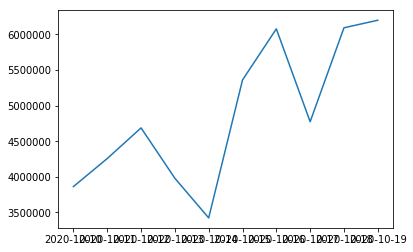

In [90]:
plt.plot(x,y)

In [91]:
data11402.describe()

,Account Number,Total
count,10.0,1.000000e+01
mean,11402.0,4.871400e+06
std,0.0,1.015423e+06
min,11402.0,3.423000e+06
25%,11402.0,4.049250e+06
50%,11402.0,4.730500e+06
75%,11402.0,5.898500e+06
max,11402.0,6.199000e+06
